# Postwork Sesión 05

In [24]:
import pandas as pd
from sklearn.datasets import load_wine
dataset = load_wine()
x, y = dataset.data, dataset.target

In [25]:
import numpy as np
from matplotlib import pyplot as plt
from sklearn import tree as treeClassifier
from sklearn.ensemble import RandomForestClassifier as forest
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

In [26]:
wine = pd.DataFrame(x, columns=dataset.feature_names)
print(wine.head())

   alcohol  malic_acid   ash  alcalinity_of_ash  magnesium  total_phenols  \
0    14.23        1.71  2.43               15.6      127.0           2.80   
1    13.20        1.78  2.14               11.2      100.0           2.65   
2    13.16        2.36  2.67               18.6      101.0           2.80   
3    14.37        1.95  2.50               16.8      113.0           3.85   
4    13.24        2.59  2.87               21.0      118.0           2.80   

   flavanoids  nonflavanoid_phenols  proanthocyanins  color_intensity   hue  \
0        3.06                  0.28             2.29             5.64  1.04   
1        2.76                  0.26             1.28             4.38  1.05   
2        3.24                  0.30             2.81             5.68  1.03   
3        3.49                  0.24             2.18             7.80  0.86   
4        2.69                  0.39             1.82             4.32  1.04   

   od280/od315_of_diluted_wines  proline  
0                  

In [27]:
wine.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


In [28]:
wine.shape

(178, 13)

In [29]:
[x_train, x_test, y_train, y_test] = train_test_split(x, y, train_size=0.60) # test_size

print(x_train.shape)
print(x_test.shape)

(106, 13)
(72, 13)


In [30]:
# Genera un bosque de 800 arboles.
bosque = forest(n_estimators = 800)
# Utiliza los datos de entrenamiento (x entrenamiento / y entrenamiento)
bosque.fit(x_train, y_train)
# Entrena el bosque con ellos. Una vez entrenado, genera una salida y_predichos con la función \"predict\"
print(bosque.predict(x_test))

[2 1 2 1 2 1 0 2 1 2 0 2 2 1 2 0 0 0 1 2 1 1 2 0 2 1 1 1 2 0 0 1 2 1 1 2 2
 0 0 0 2 0 2 1 0 2 1 1 2 0 0 1 2 0 2 2 0 0 0 1 1 2 1 1 1 0 1 1 0 1 0 2]


In [31]:
y_esperados = y_test
y_predichos = bosque.predict(x_test)
resultado = confusion_matrix(y_esperados, y_predichos)
print(resultado)

[[22  0  0]
 [ 0 26  1]
 [ 0  0 23]]


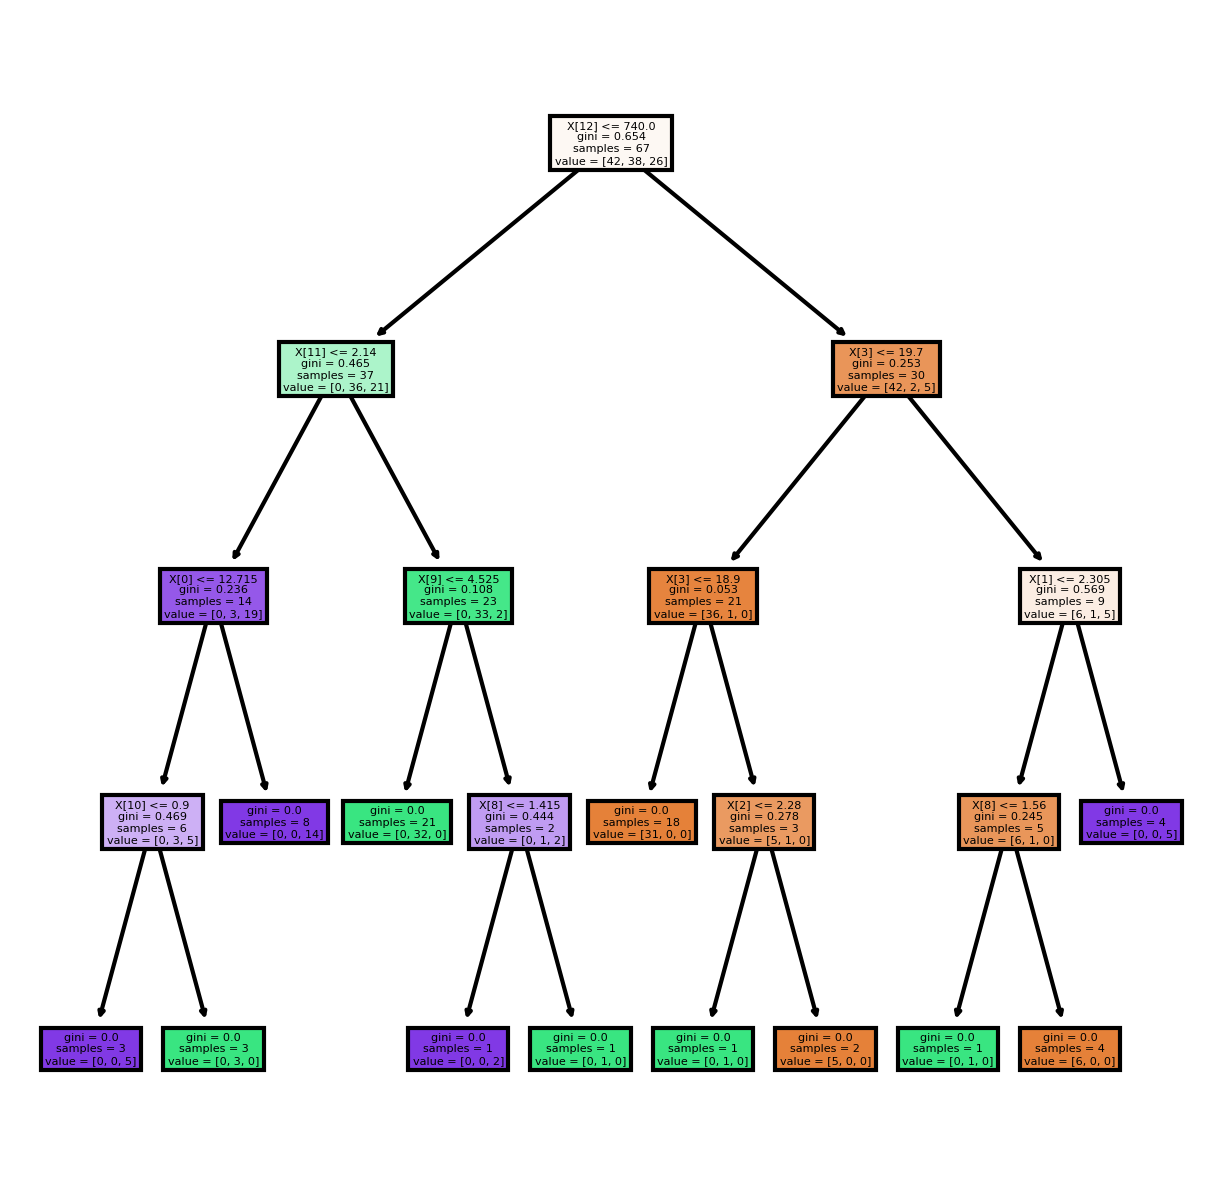

In [32]:
numeroArbol = 1
arbolDelBosque = bosque.estimators_[numeroArbol]

plt.figure(figsize = (5,5), dpi = 300)
treeClassifier.plot_tree(arbolDelBosque,filled = True);
plt.show()